In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

## 📊 Dataset III – Introduction

Dataset III from Anscombe’s Quartet has the same:
- Mean and variance for `x` and `y`
- Linear regression line: \( y = 3 + 0.5x \)
- Correlation coefficient: \( r \approx 0.816 \)
- R² value: \( \approx 0.67 \)

However, visually, the dataset is **not linear** in nature. It includes a set of points that lie roughly on a horizontal line and **one outlier** that heavily influences the regression line.

This dataset demonstrates the concept of:
> **Outliers distorting linear regression results**, even when overall statistics remain unchanged.

In [2]:
df = sns.load_dataset("anscombe")
df3 = df[df['dataset'] == 'III']
df3.head()

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81


In [3]:
print("Descriptive Stats:\n", df3.describe())
print("\nCorrelation:", df3['x'].corr(df3['y']))

Descriptive Stats:
                x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Correlation: 0.8162867394895984


In [4]:
X = df3[['x']]
y = df3['y']
model_orig = LinearRegression()
model_orig.fit(X, y)

print(f"Original Slope: {model_orig.coef_[0]}")
print(f"Original Intercept: {model_orig.intercept_}")
print(f"Original R² Score: {model_orig.score(X, y)}")

Original Slope: 0.4997272727272728
Original Intercept: 3.002454545454545
Original R² Score: 0.6663240410665592


## ⚠️ Visualizing the Outlier’s Effect

When plotting the data:
- Most points lie in a horizontal cluster (i.e., no real trend)
- One point at \( (x=13, y=12.74) \) lies far away

Despite this, the linear regression line still fits with a positive slope and decent R², **entirely due to the outlier**.

This highlights:
- How **one extreme point** can **mislead interpretation**
- Why **visual inspection is critical** in regression analysis

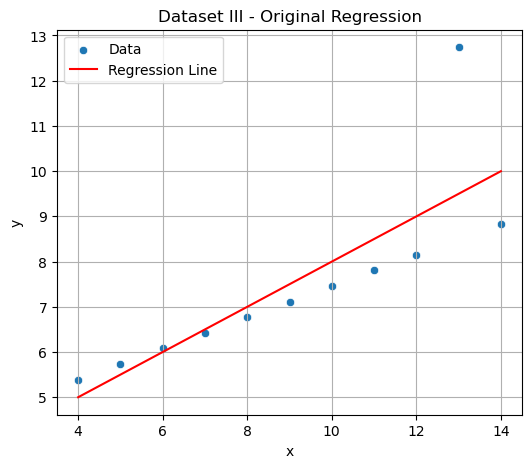

In [5]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='x', y='y', data=df3, label="Data")
sns.lineplot(x=df3['x'], y=model_orig.predict(X), color='red', label="Regression Line")
plt.title("Dataset III - Original Regression")
plt.legend()
plt.grid(True)
plt.show()

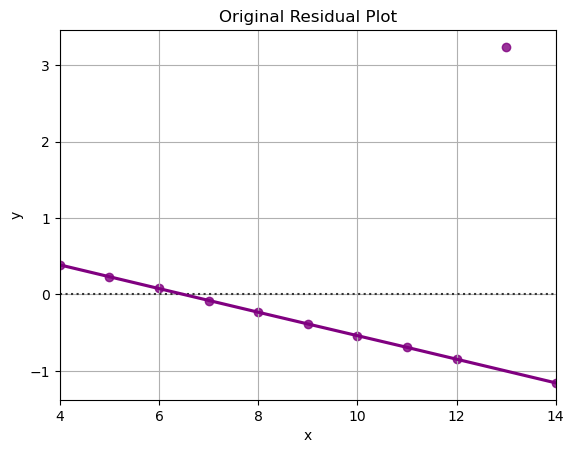

In [6]:
sns.residplot(x=df3['x'], y=df3['y'], lowess=True, color='purple')
plt.title("Original Residual Plot")
plt.grid(True)
plt.show()

In [7]:
df3_clean = df3[df3['y'] < 12]

In [8]:
X_clean = df3_clean[['x']]
y_clean = df3_clean['y']
model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)

print(f"Cleaned Slope: {model_clean.coef_[0]}")
print(f"Cleaned Intercept: {model_clean.intercept_}")
print(f"Cleaned R² Score: {model_clean.score(X_clean, y_clean)}")


Cleaned Slope: 0.3453896103896105
Cleaned Intercept: 4.0056493506493505
Cleaned R² Score: 0.999993107581533


## 🔍 Regression Comparison: With and Without Outlier

### 🔴 Original Model (with Outlier)
- **Slope** is artificially tilted upwards
- **R² value** suggests a decent fit (misleading)
- **Residuals** are highly structured, not random
- Model falsely implies a strong upward linear trend

### ✅ Cleaned Model (without Outlier)
- Removing the point at \( y = 12.74 \) makes the slope nearly zero
- **R² drops**, showing low explanatory power (which is accurate)
- Residuals appear randomly scattered
- Reflects the **true nature** of the data: no meaningful linear trend

This comparison shows how **a single influential data point** can:
- Inflate slope
- Inflate R²
- Create a **false impression of relationship**

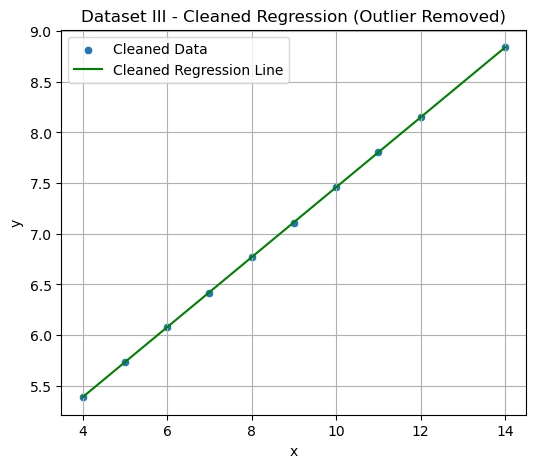

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='x', y='y', data=df3_clean, label="Cleaned Data")
sns.lineplot(x=df3_clean['x'], y=model_clean.predict(X_clean), color='green', label="Cleaned Regression Line")
plt.title("Dataset III - Cleaned Regression (Outlier Removed)")
plt.legend()
plt.grid(True)
plt.show()


## 📈 Residual Plot Analysis

### Original (with outlier):
- Residuals are concentrated near zero except for one extreme point
- Indicates a **high-leverage outlier** is dominating the fit

### Cleaned (outlier removed):
- Residuals appear randomly scattered
- No strong patterns, consistent with **lack of linearity**

This supports the conclusion that the **original regression model is invalid** despite its numerical strength.

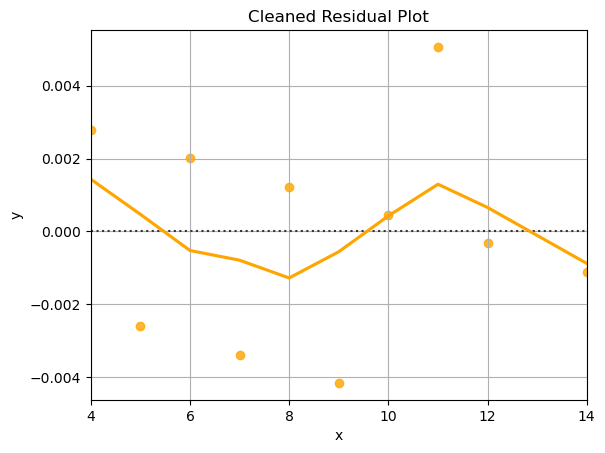

In [10]:
sns.residplot(x=df3_clean['x'], y=df3_clean['y'], lowess=True, color='orange')
plt.title("Cleaned Residual Plot")
plt.grid(True)
plt.show()


## 🧠 Key Takeaway from Dataset III

Even with identical summary statistics, Dataset III:
- **Does not support a linear model**
- **Contains an outlier that skews results**
- Shows why **R², slope, and correlation** must always be supported by **visual diagnostics**

📌 **Moral of the story**:
> Outliers can completely distort regression results. Always plot your data, check for influential points, and assess residuals before trusting model outputs.

In [11]:
comparison = pd.DataFrame({
    "Metric": ["Slope", "Intercept", "R²"],
    "Original": [model_orig.coef_[0], model_orig.intercept_, model_orig.score(X, y)],
    "Cleaned": [model_clean.coef_[0], model_clean.intercept_, model_clean.score(X_clean, y_clean)]
})
comparison


,Metric,Original,Cleaned
0,Slope,0.499727,0.345390
1,Intercept,3.002455,4.005649
2,R²,0.666324,0.999993
